In [31]:
import pandas as pd

# 读取文件
def read_data(file_path):
    df = pd.read_csv(file_path)
    return df

data = read_data('DataSample.csv')
display(data)

,Unnamed: 0,发布时间,当前微博的Url,微博内容,收藏数,点赞数,评论数,详情页url,转发量,纬度,经度
0,109085,2020/1/8 13:44,https://weibo.com/3490845395/IowIoajPn?from=pa...,\r\n广州南到湛江西的D7471次列车上，一对新人乘动车接亲。车长称，新郎来自茂名，新娘来...,收藏,2072,811,https://www.weibo.com/u/5702300663,1525,30.10938,114.32286
1,808092,2020/1/23 22:57,https://weibo.com/1901836780/IqRKmoKW9?from=pa...,\r\n各地的人们，武汉人此刻不是你的敌人，绝…绝大部分人同样也是受害者，他们不吃野味，没去...,收藏,11,5,https://www.weibo.com/u/1901836780,1,30.69444,114.73662
2,495640,2020/4/14 11:43,https://weibo.com/6031854220/IDgnqbGZb?from=pa...,\r\n完美框架????,收藏,33107,1915,https://www.weibo.com/u/7301166159,3218,30.47156,114.39182
3,163194,2020/2/12 12:35,https://weibo.com/5871659107/ItQdRrZoc?from=pa...,\r\n#出版社回应儿童刊物称果子狸可吃#不要恶心我了好吗？有些评论真的看着我要吐了武汉大学...,收藏,9,7,https://www.weibo.com/u/5871659107,转发,30.24868,113.90910
4,659742,2020/3/7 14:30,https://weibo.com/2711617463/Ixves9QZl?from=pa...,\r\n是春天呀2杭州·钱塘江奥体中心码头????,收藏,3,评论,https://www.weibo.com/u/1701970210,转发,30.94518,113.73670
...,...,...,...,...,...,...,...,...,...,...,...
4995,751443,2020/2/26 1:30,https://weibo.com/3157461260/IvTQv5buB?from=pa...,\r\n从18岁到23岁图集制作完成啦眨眼就到本命年了2黄冈·红安县L阮阮阮阮L的微博视频????,收藏,4,2,https://www.weibo.com/u/5531547147,转发,31.05662,114.56422
4996,419947,2020/2/21 21:48,https://weibo.com/6867422822/IvgGHFAIJ?from=pa...,\r\n@王思聪点点浪漫的烛光，岁岁生日的幸福！?查看动图,收藏,赞,评论,https://www.weibo.com/u/6867422822,转发,31.08448,114.52974
4997,382187,2020/4/12 14:52,https://weibo.com/1956778835/ICYLe1iqL?from=pa...,\r\n分享图片????,收藏,1,评论,https://www.weibo.com/u/1956778835,转发,30.61086,114.49526
4998,712808,2020/4/19 21:40,https://weibo.com/3829535407/IE5pXj0Ji?from=pa...,\r\n平平无奇做饭小天才～??#周末宅家料理大赛#2深圳·大芬油画村????,收藏,赞,评论,https://www.weibo.com/u/3829535407,转发,31.22378,114.46078


In [32]:
import re

# 清洗无效数据
def clean_data(df):
    # 将无效值填充为0
    cols = ['收藏数', '点赞数', '评论数', '转发量']
    df[cols] = df[cols].replace(['收藏', '点赞', '评论', '转发'], 0)
    df[cols] = df[cols].replace(['收藏', '赞', '评论', '转发'], 0)
    return df

def clean_text(text):
    pattern = re.compile(r'[^\u4e00-\u9fa5，。！？]')
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

def parse_dates(df):
    df['发布时间'] = pd.to_datetime(df['发布时间'], format='%Y/%m/%d %H:%M', errors='coerce')
    df.dropna(subset=['发布时间'], inplace=True)  # 删除无效日期
    return df

def filter_and_format_dates(df):
    # 过滤掉发布时间在2019/12/15之前的数据
    df = df[df['发布时间'] >= '2019/12/15']
    return df

data = clean_data(data)
data['微博内容'] = data['微博内容'].apply(clean_text)
data = parse_dates(data)
data = filter_and_format_dates(data)
display(data)

,Unnamed: 0,发布时间,当前微博的Url,微博内容,收藏数,点赞数,评论数,详情页url,转发量,纬度,经度
0,109085,2020-01-08 13:44:00,https://weibo.com/3490845395/IowIoajPn?from=pa...,广州南到湛江西的次列车上，一对新人乘动车接亲。车长称，新郎来自茂名，新娘来自广州，两地车程甚...,0,2072,811,https://www.weibo.com/u/5702300663,1525,30.10938,114.32286
1,808092,2020-01-23 22:57:00,https://weibo.com/1901836780/IqRKmoKW9?from=pa...,各地的人们，武汉人此刻不是你的敌人，绝绝大部分人同样也是受害者，他们不吃野味，没去过华南海鲜...,0,11,5,https://www.weibo.com/u/1901836780,1,30.69444,114.73662
2,495640,2020-04-14 11:43:00,https://weibo.com/6031854220/IDgnqbGZb?from=pa...,完美框架,0,33107,1915,https://www.weibo.com/u/7301166159,3218,30.47156,114.39182
3,163194,2020-02-12 12:35:00,https://weibo.com/5871659107/ItQdRrZoc?from=pa...,出版社回应儿童刊物称果子狸可吃不要恶心我了好吗？有些评论真的看着我要吐了武汉大学出版社出的一...,0,9,7,https://www.weibo.com/u/5871659107,0,30.24868,113.90910
4,659742,2020-03-07 14:30:00,https://weibo.com/2711617463/Ixves9QZl?from=pa...,是春天呀杭州钱塘江奥体中心码头,0,3,0,https://www.weibo.com/u/1701970210,0,30.94518,113.73670
...,...,...,...,...,...,...,...,...,...,...,...
4995,751443,2020-02-26 01:30:00,https://weibo.com/3157461260/IvTQv5buB?from=pa...,从岁到岁图集制作完成啦眨眼就到本命年了黄冈红安县阮阮阮阮的微博视频,0,4,2,https://www.weibo.com/u/5531547147,0,31.05662,114.56422
4996,419947,2020-02-21 21:48:00,https://weibo.com/6867422822/IvgGHFAIJ?from=pa...,王思聪点点浪漫的烛光，岁岁生日的幸福！查看动图,0,0,0,https://www.weibo.com/u/6867422822,0,31.08448,114.52974
4997,382187,2020-04-12 14:52:00,https://weibo.com/1956778835/ICYLe1iqL?from=pa...,分享图片,0,1,0,https://www.weibo.com/u/1956778835,0,30.61086,114.49526
4998,712808,2020-04-19 21:40:00,https://weibo.com/3829535407/IE5pXj0Ji?from=pa...,平平无奇做饭小天才周末宅家料理大赛深圳大芬油画村,0,0,0,https://www.weibo.com/u/3829535407,0,31.22378,114.46078


In [33]:
from snownlp import SnowNLP

def calculate_sentiment(text):
    try:
        s = SnowNLP(text)
        return s.sentiments  # 返回一个介于0到1之间的情感分数，接近1越积极，接近0越消极
    except:
        return -1

data['Sentiment'] = data['微博内容'].apply(calculate_sentiment)
data = data[data['Sentiment'] != -1]
display(data)

,Unnamed: 0,发布时间,当前微博的Url,微博内容,收藏数,点赞数,评论数,详情页url,转发量,纬度,经度,Sentiment
0,109085,2020-01-08 13:44:00,https://weibo.com/3490845395/IowIoajPn?from=pa...,广州南到湛江西的次列车上，一对新人乘动车接亲。车长称，新郎来自茂名，新娘来自广州，两地车程甚...,0,2072,811,https://www.weibo.com/u/5702300663,1525,30.10938,114.32286,0.999252
1,808092,2020-01-23 22:57:00,https://weibo.com/1901836780/IqRKmoKW9?from=pa...,各地的人们，武汉人此刻不是你的敌人，绝绝大部分人同样也是受害者，他们不吃野味，没去过华南海鲜...,0,11,5,https://www.weibo.com/u/1901836780,1,30.69444,114.73662,0.996296
2,495640,2020-04-14 11:43:00,https://weibo.com/6031854220/IDgnqbGZb?from=pa...,完美框架,0,33107,1915,https://www.weibo.com/u/7301166159,3218,30.47156,114.39182,0.959656
3,163194,2020-02-12 12:35:00,https://weibo.com/5871659107/ItQdRrZoc?from=pa...,出版社回应儿童刊物称果子狸可吃不要恶心我了好吗？有些评论真的看着我要吐了武汉大学出版社出的一...,0,9,7,https://www.weibo.com/u/5871659107,0,30.24868,113.90910,0.447276
4,659742,2020-03-07 14:30:00,https://weibo.com/2711617463/Ixves9QZl?from=pa...,是春天呀杭州钱塘江奥体中心码头,0,3,0,https://www.weibo.com/u/1701970210,0,30.94518,113.73670,0.898183
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,751443,2020-02-26 01:30:00,https://weibo.com/3157461260/IvTQv5buB?from=pa...,从岁到岁图集制作完成啦眨眼就到本命年了黄冈红安县阮阮阮阮的微博视频,0,4,2,https://www.weibo.com/u/5531547147,0,31.05662,114.56422,0.998088
4996,419947,2020-02-21 21:48:00,https://weibo.com/6867422822/IvgGHFAIJ?from=pa...,王思聪点点浪漫的烛光，岁岁生日的幸福！查看动图,0,0,0,https://www.weibo.com/u/6867422822,0,31.08448,114.52974,0.996895
4997,382187,2020-04-12 14:52:00,https://weibo.com/1956778835/ICYLe1iqL?from=pa...,分享图片,0,1,0,https://www.weibo.com/u/1956778835,0,30.61086,114.49526,0.842811
4998,712808,2020-04-19 21:40:00,https://weibo.com/3829535407/IE5pXj0Ji?from=pa...,平平无奇做饭小天才周末宅家料理大赛深圳大芬油画村,0,0,0,https://www.weibo.com/u/3829535407,0,31.22378,114.46078,0.539295


In [34]:
def descriptive_statistics(data):
    # 对数值型数据进行描述性统计分析
    numerical_cols = ['收藏数', '点赞数', '评论数', '转发量', '纬度', '经度', 'Sentiment']
    stats = data[numerical_cols].describe()

    # 整理描述统计结果
    stats.loc['count'] = stats.loc['count'].astype(int)  # 将count转换为整数
    return stats

data['收藏数'] = pd.to_numeric(data['收藏数'], errors='coerce')  # 转换为数值型数据
data['点赞数'] = pd.to_numeric(data['点赞数'], errors='coerce')  # 转换为数值型数据
data['评论数'] = pd.to_numeric(data['评论数'], errors='coerce')  # 转换为数值型数据
data['转发量'] = pd.to_numeric(data['转发量'], errors='coerce')  # 转换为数值型数据

# 删除无效数据行
data = data.dropna(subset=['收藏数', '点赞数', '评论数', '转发量'])

# 进行描述性统计分析
stats = descriptive_statistics(data)

# 输出表格
display(stats)

,收藏数,点赞数,评论数,转发量,纬度,经度,Sentiment
count,4929.0,4.929000e+03,4.929000e+03,4.929000e+03,4929.000000,4929.000000,4.929000e+03
mean,0.0,3.123200e+04,2.440526e+03,6.708108e+03,30.589907,114.291101,6.764286e-01
std,0.0,1.866073e+05,3.951835e+04,2.242453e+05,0.364048,0.366398,3.565055e-01
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,29.997940,113.736700,5.190515e-12
25%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,30.304400,113.978060,3.823305e-01
50%,0.0,1.000000e+00,0.000000e+00,0.000000e+00,30.555140,114.288380,8.428114e-01
75%,0.0,8.000000e+00,5.000000e+00,0.000000e+00,30.861600,114.564220,9.946391e-01
max,0.0,4.570546e+06,2.422235e+06,1.545773e+07,31.363080,115.081420,1.000000e+00


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 设置中文字体
def set_chinese_font():
    chinese_font_path = 'C:\\Windows\\Fonts\\simsun.ttc'  # 宋体
    prop = fm.FontProperties(fname=chinese_font_path)
    plt.rcParams['font.family'] = prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

set_chinese_font()

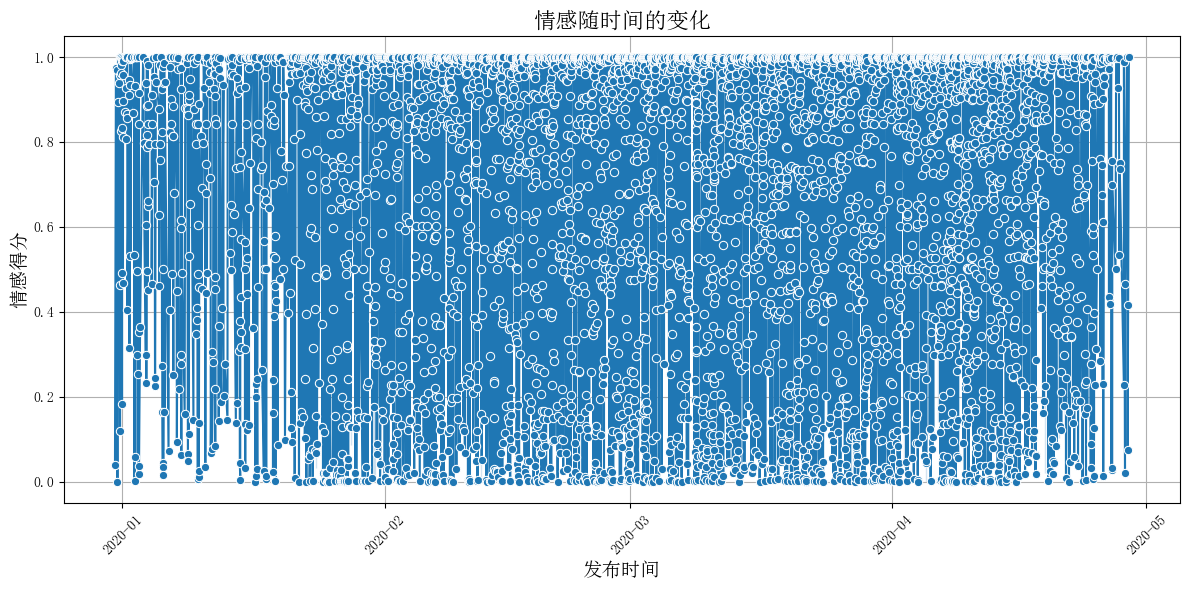

In [36]:
import matplotlib.dates as mdates

def plot_sentiment_vs_time(df):
    plt.figure(figsize=(12, 6))
    df = df.sort_values('发布时间')
    sns.lineplot(data=df, x='发布时间', y='Sentiment', marker='o')
    plt.title('情感随时间的变化', fontsize=16)
    plt.xlabel('发布时间', fontsize=14)
    plt.ylabel('情感得分', fontsize=14)

    # 格式化X轴为月份
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_sentiment_vs_time(data)

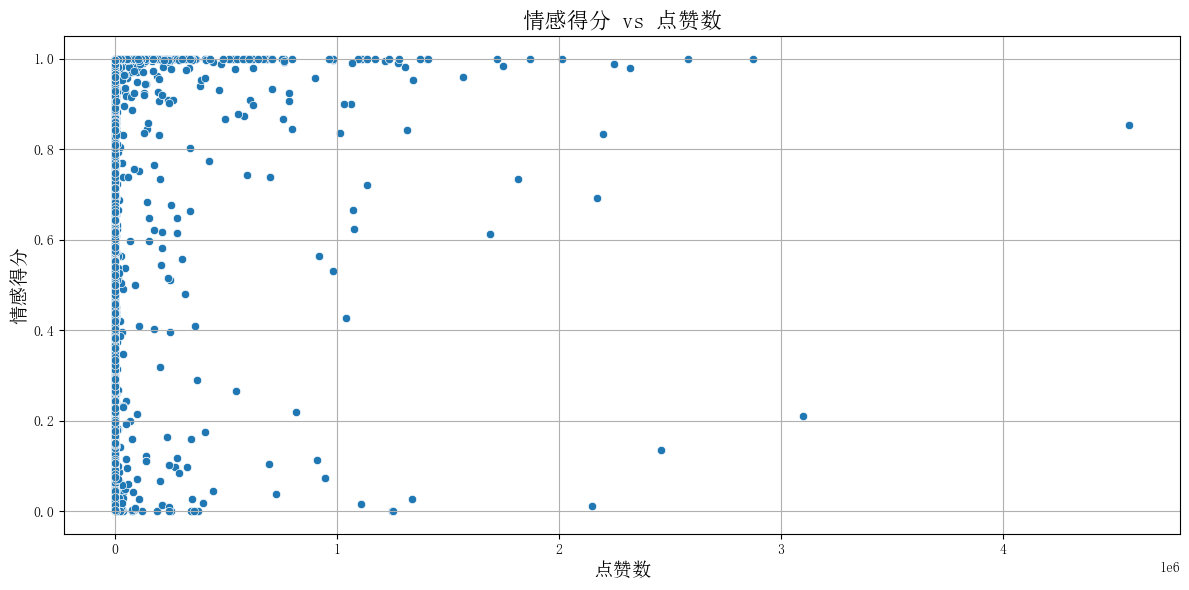

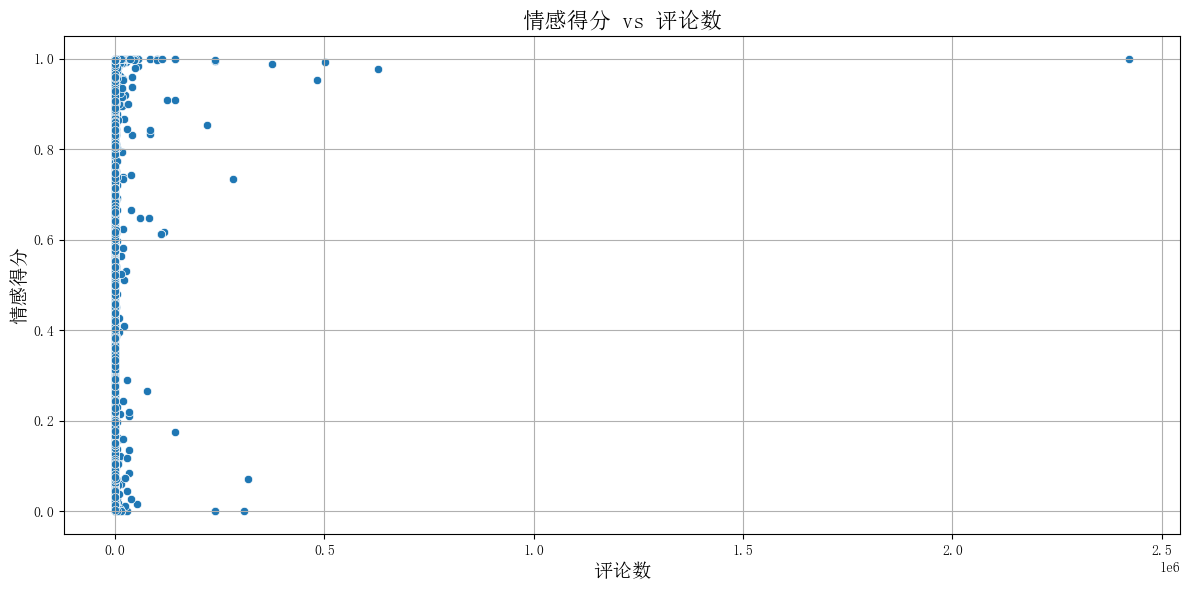

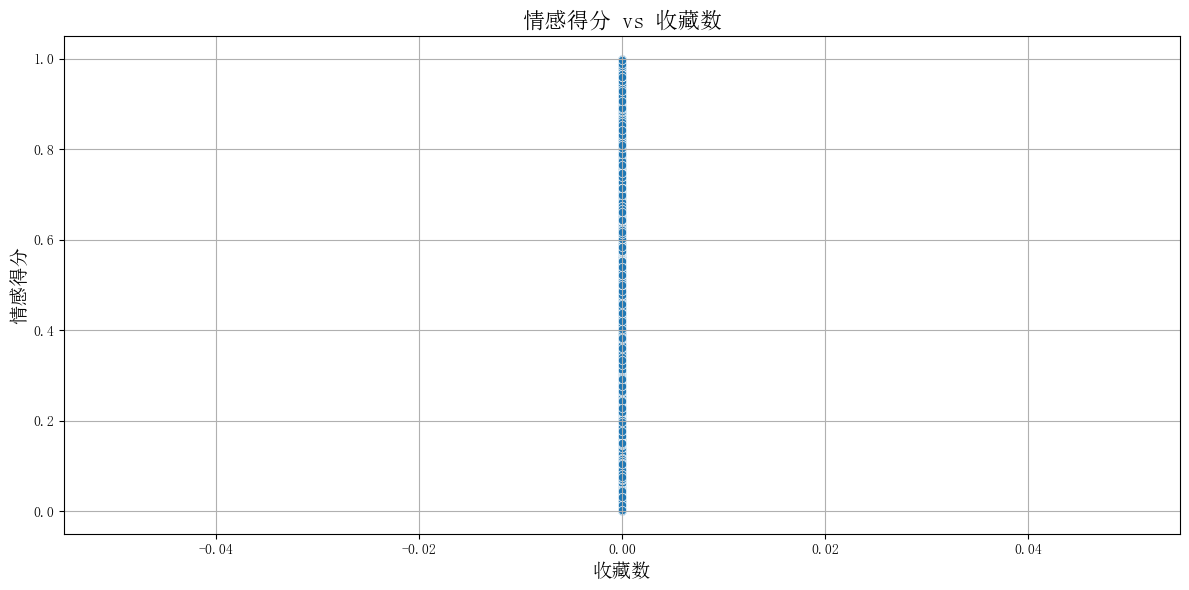

In [37]:
def plot_sentiment_vs_variables(df):
    variables = ['点赞数', '评论数', '收藏数']
    for var in variables:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=df, x=var, y='Sentiment')
        plt.title(f'情感得分 vs {var}', fontsize=16)
        plt.xlabel(var, fontsize=14)
        plt.ylabel('情感得分', fontsize=14)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_sentiment_vs_variables(data)

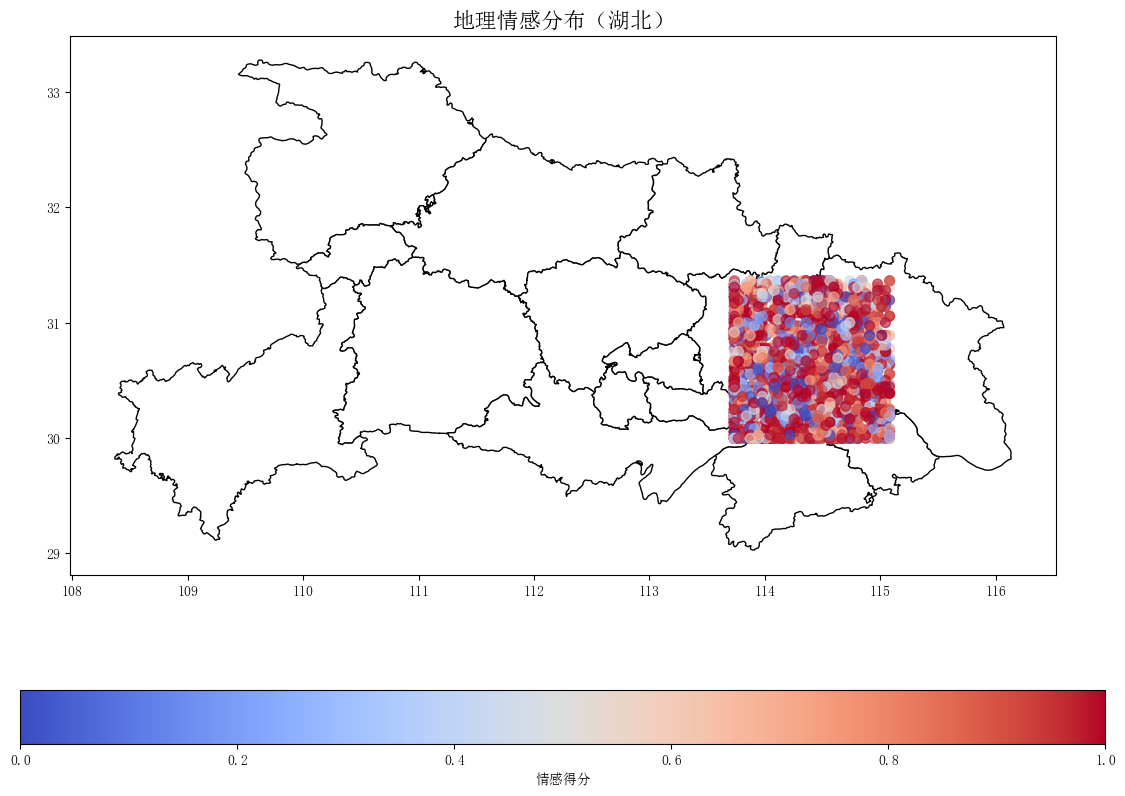

In [43]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# 读取中国分省地图
def get_china_provinces_shapefile():
    provinces = gpd.read_file('map/hubei.shp')
    return provinces

# 绘制地理情感分布
def plot_geographical_sentiment(df):
    geometry = [Point(xy) for xy in zip(df['经度'], df['纬度'])]
    geo_df = gpd.GeoDataFrame(df, geometry=geometry)

    provinces = get_china_provinces_shapefile()

    # 绘制地图
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    base = provinces.plot(ax=ax, color='white', edgecolor='black')

    # 绘制情感数据点
    geo_df.plot(column='Sentiment', ax=base, legend=True, cmap='coolwarm',
                legend_kwds={'label': "情感得分", 'orientation': "horizontal"},
                markersize=50, alpha=0.6)

    plt.title('地理情感分布（湖北）', fontsize=16)
    plt.show()

plot_geographical_sentiment(data)